In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:

# Used the 3 lines of code to get a general sense of all 5 files that were read into jupyter (I repeated the same 3 lines 5 times)

#Instacart Orders DataFrame
#instacart_orders.sample(5)
instacart_orders.info()
#instacart_orders.columns
#instacart_orders['order_dow'].value_counts()
# This dataframe contains all numeric data. Column "days_since_prior_order" contains null values.

#Products Dataframe
#products.sample(5)
products.info()
#products.columns
# The products dataframe contains both numeric and textual data. Column "product_name" seems to contain null values.

#Aisles Dataframe
#aisles.sample(5)
aisles.info()
#aisles.columns
# The aisles dataframe contains both numeric and textual data. There are no null values in this dataframe.

#Departments Dataframe
#departments.sample(5)
departments.info()
#departments.columns
# The departments dataframe contains both numeric and textual data. There are no null values in this dataframe.

#Order Products Dataframe
#order_products.sample(10)
order_products.info()
#order_products.columns
# The order products dataframe contains just numeric data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage:

In [4]:
# Check for duplicated orders
instacart_orders.duplicated().sum()


15

In [5]:
# Check for all orders placed Wednesday at 2:00 AM
# Correct column name
day_mapping = {0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'}

# Applying the mapping to the correct 'order_dow' column
instacart_orders['order_dow'] = instacart_orders['order_dow'].map(day_mapping)
    

instacart_orders.query("order_dow == 'wednesday' & order_hour_of_day == 2")

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,wednesday,2,16.0
5156,2190225,138285,18,wednesday,2,11.0
15506,553049,58599,13,wednesday,2,7.0
18420,382357,120200,19,wednesday,2,11.0
24691,690242,77357,2,wednesday,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,wednesday,2,30.0
458816,910166,164782,18,wednesday,2,4.0
459635,1680532,106435,6,wednesday,2,21.0
468324,222962,54979,59,wednesday,2,3.0


In [6]:
# Remove duplicate orders
instacart_orders.drop_duplicates(inplace=True)

In [7]:
# Double check for duplicate rows
instacart_orders.duplicated().sum()

0

In [8]:
# Double check for duplicate order IDs only
instacart_orders['order_id'].duplicated().sum()

0

In [9]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [10]:
# Check for just duplicate product IDs
#products.columns
products['product_id'].duplicated().sum()

0

In [11]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products.columns
products['product_name'] = products['product_name'].str.lower()
products['product_name']
products['product_name'].duplicated().sum()

1361

In [12]:
# Check for duplicate product names that aren't missing
no_missing_products = products['product_name'][~products['product_name'].isna()]
no_missing_products.duplicated().sum()

104

In [13]:
# Check for fully duplicate rows
#departments.duplicated().sum()
#departments.columns
# Double check for duplicate department IDs
departments['department_id'].duplicated().sum()

0

In [14]:
#departments.head()
# Double check for duplicate department enties
departments['department'].duplicated().sum()

0

In [15]:
# Check for fully duplicate rows
aisles['aisle'].duplicated().sum()
# Double check for duplicate aisles IDs
aisles['aisle_id'].duplicated().sum()

0

In [16]:
# Double check for duplicate aisles IDs
aisles['aisle_id'].duplicated().sum()

0

In [17]:
# Check for fully duplicate rows
order_products.loc[order_products['reordered'] == 0, 'reordered'] = 'never_ordered' # Replace specific value in a column
order_products.loc[order_products['reordered'] == 1, 'reordered'] = 'ordered' # Replace specific value in a column
#order_products.duplicated().sum()
order_products.columns
# Double check for duplicate aisles IDs
#order_products['_id'].duplicated().sum()


Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')

In [18]:
# Double check for any other tricky duplicates
order_products.head()
# Double check for duplicate department enties
#order_products[''].duplicated().sum()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,never_ordered
1,567889,1560,1.0,ordered
2,2261212,26683,1.0,ordered
3,491251,8670,35.0,ordered
4,2571142,1940,5.0,ordered


In [19]:
#products.isna().sum()
products.columns
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [20]:
# Are all of the missing product names associated with aisle ID 100?- Yes, all of the missing product names are associated with aisle ID 100.
products.query("product_name.isna() == True and aisle_id == 100")

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [21]:
# Are all of the missing product names associated with department ID 21? - Yes, all of the missing product names are associated with department ID 21.
products.query("product_name.isna() == True and department_id == 21")

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [22]:
# What is this ailse and department?
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [23]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].astype('str')
products['product_name'] = products['product_name'].fillna(value='Unknown')
products['product_name'].isna().sum()

0

In [24]:
instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [25]:
# Are there any missing values where it's not a customer's first order? - There seems to be no values where it's not a customer's first order.
instacart_orders.query("order_number.isna() == True and days_since_prior_order != 0")

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [26]:
#order_products.isna().sum()
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,never_ordered
1,567889,1560,1.0,ordered
2,2261212,26683,1.0,ordered
3,491251,8670,35.0,ordered
4,2571142,1940,5.0,ordered


In [27]:
# What are the min and max values in this column? - The min & max values for this column are 1.0 & 64.0.
order_products['add_to_cart_order'].min()
order_products['add_to_cart_order'].max()

64.0

In [28]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
# the total number of values in 'add_to_cart_order' column regardless of it's missing is 4544171
# After running order_products.isna().sum(), there are 836 missing values in the add_to_cart_order column
missing_add_to_cart = order_products[order_products['add_to_cart_order'].isna()]
order_ids_with_miss_values = missing_add_to_cart['order_id'].unique()

In [29]:
# Do all orders with missing values have more than 64 products?
missing_orders = order_products[order_products['order_id'].isin(order_ids_with_miss_values)] # Using the array of order ids that was created as reference to get any orders with missing values out of the OG dataframe.
product_counts = missing_orders.groupby('order_id').size()
orders_with_many_products = product_counts[product_counts > 64]
orders_with_many_products

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Length: 70, dtype: int64

In [30]:
# Replace missing values with 999 and convert column to integer type
#order_products['add_to_cart_order'].isna().sum()  # Total number of missing values (Dataframe/Series)
#order_products.info()
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(value= 999.0)  # Fill missing values
#order_products['add_to_cart_order'].isna().sum()
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   order_id           int64 
 1   product_id         int64 
 2   add_to_cart_order  int64 
 3   reordered          object
dtypes: int64(3), object(1)
memory usage: 138.7+ MB


### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [31]:
#In the beginning of this project I had mapped the day of the week string equivalents to the 0 through 6 values for readability purposes
reverse_day_mapping = {'sunday': 0,'monday': 1,'tuesday': 2,'wednesday': 3,'thursday': 4,'friday': 5,'saturday': 6}
instacart_orders['order_dow'] = instacart_orders['order_dow'].map(reverse_day_mapping)

instacart_orders['order_dow'].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

In [32]:
instacart_orders['order_hour_of_day'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

### [A2] What time of day do people shop for groceries?

Text(0, 0.5, '# of Orders')

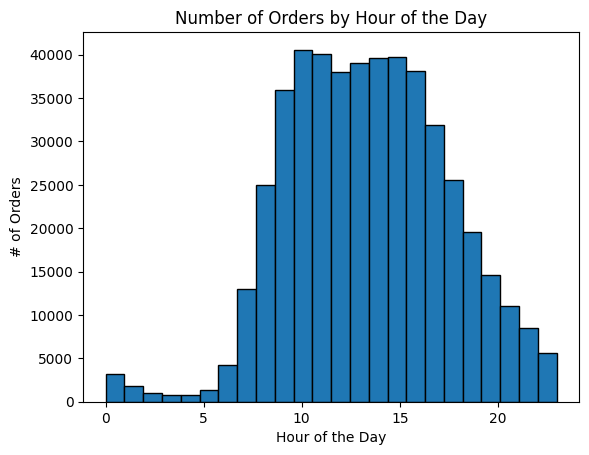

In [33]:
instacart_orders.head(15)
bx = instacart_orders['order_hour_of_day'].plot(kind='hist', bins=24, edgecolor='black')
bx.set_title('Number of Orders by Hour of the Day')
bx.set_xlabel('Hour of the Day')
bx.set_ylabel('# of Orders')


Judging from the histogram, it seems the anywhere from the hours of 9am to 3pm is when most people shop for groceries.

### [A3] What day of the week do people shop for groceries?

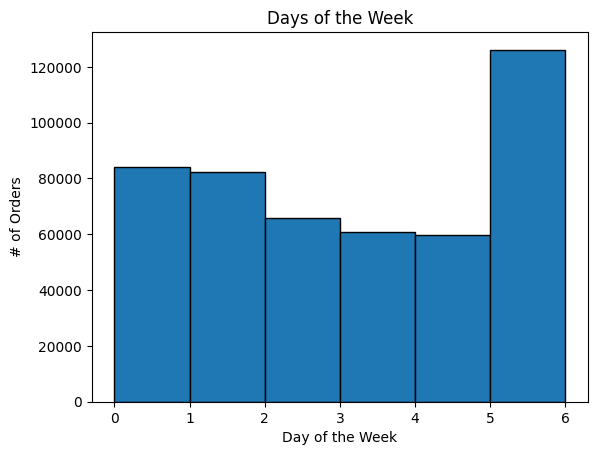

In [34]:
instacart_orders['order_dow'].value_counts().sort_index()

ax = instacart_orders['order_dow'].plot(kind='hist', bins=6, edgecolor='black')
ax.set_title('Days of the Week')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('# of Orders')
plt.show()

From the histogram, it looks like Saturday is the day of the week when most people shop for groceries.

### [A4] How long do people wait until placing another order?

In [35]:
instacart_orders['days_since_prior_order'].value_counts().sort_index()


0.0      9589
1.0     20179
2.0     27138
3.0     30224
4.0     31006
5.0     30096
6.0     33930
7.0     44577
8.0     25361
9.0     16753
10.0    13309
11.0    11467
12.0    10658
13.0    11737
14.0    13992
15.0     9416
16.0     6587
17.0     5498
18.0     4971
19.0     4939
20.0     5302
21.0     6448
22.0     4514
23.0     3337
24.0     3015
25.0     2711
26.0     2640
27.0     2986
28.0     3745
29.0     2673
30.0    51337
Name: days_since_prior_order, dtype: int64

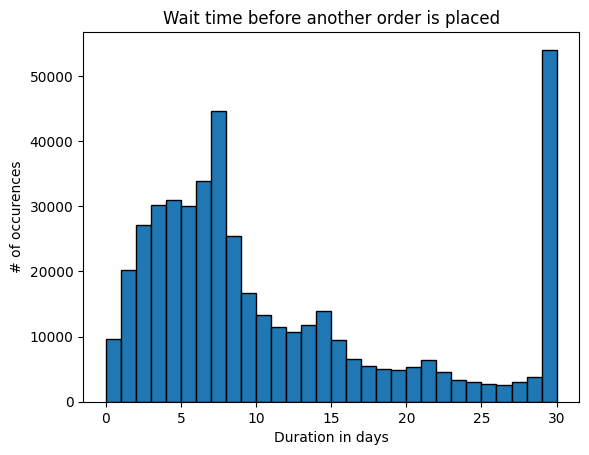

In [36]:
ax = instacart_orders['days_since_prior_order'].plot(kind='hist', bins=30, edgecolor='black')
ax.set_title('Wait time before another order is placed')
ax.set_xlabel('Duration in days')
ax.set_ylabel('# of occurences')
plt.show()


The histogram is telling me that most people wait 30 days before placing another order.

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

In [37]:
wednesday_orders = instacart_orders[instacart_orders['order_dow'] == 3]
saturday_orders = instacart_orders[instacart_orders['order_dow'] == 6]


In [38]:
wednesday_orders.head(5)
saturday_orders.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
11,102585,191558,18,6,16,8.0
14,2843219,74699,4,6,11,30.0
20,50934,178510,9,6,9,5.0
26,1844247,122558,4,6,18,30.0


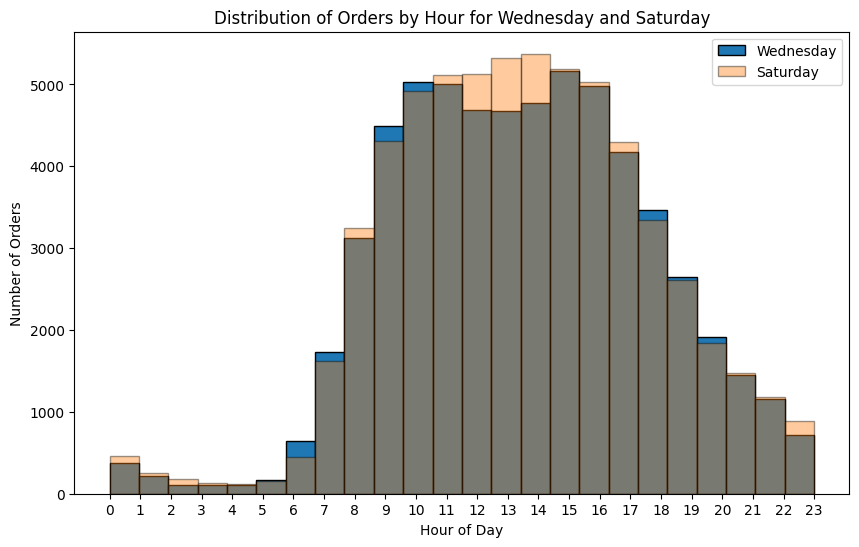

In [39]:
plt.figure(figsize=(10, 6))
plt.hist(wednesday_orders['order_hour_of_day'], bins=24, alpha=1.0, label='Wednesday', edgecolor='black')
plt.hist(saturday_orders['order_hour_of_day'], bins=24, alpha=0.4, label='Saturday', edgecolor='black')

plt.title('Distribution of Orders by Hour for Wednesday and Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend()
plt.xticks(range(0, 24))  # Ensuring each hour is labeled
plt.show()

Based on the graph, it seems that by the hour(generally speaking), Saturday is the day that have the most  grocery orders placed. On a more technical note, Wednesday around the hours of 6 to 7 am, 9 to 10 am, and 6 to 8 am, more people seem to place orders than on Saturday. From a profit standpoint, Saturdays are more profitable.

### [B2] What's the distribution for the number of orders per customer?

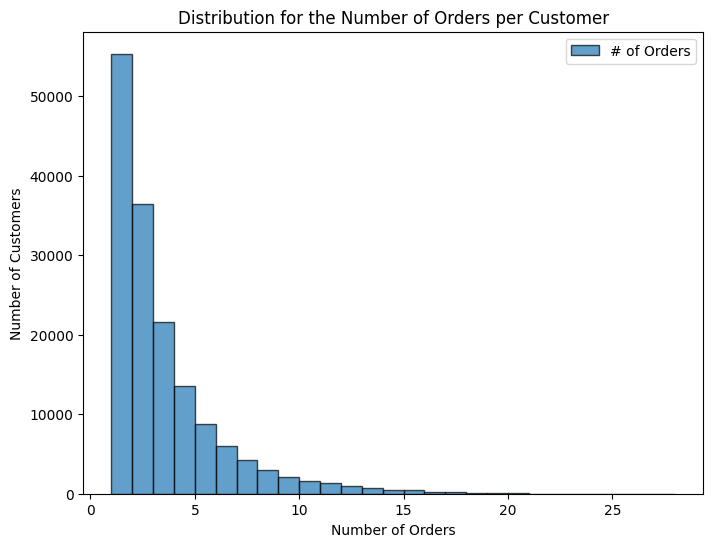

In [40]:
orders_per_user = instacart_orders.groupby('user_id').size()

plt.figure(figsize=(8, 6))
plt.hist(orders_per_user, bins=range(1, orders_per_user.max() + 1), alpha=0.7, label='# of Orders', edgecolor='black')

plt.title('Distribution for the Number of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.legend()
plt.show()

Based on the horizontal bar chart, it seems like a large majority of customers tend to have less than 5 orders. With that being said, the main message that this graph is conveying is that not many people use Instacart for large orders; the higher the order count, the less amount of occurences of customers having those higher orders.

### [B3] What are the top 20 popular products (display their id and name)?

In [41]:
order_products.head()
products.head()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13


In [42]:
product_counts = order_products['product_id'].value_counts().head(20)
product_counts = product_counts.reset_index()
product_counts.columns = ['product_id', 'count']
top_products = product_counts.merge(products, on='product_id')
top_products[['product_id', 'product_name', 'count']]

,product_id,product_name,count
0,24852,banana,66050
1,13176,bag of organic bananas,53297
2,21137,organic strawberries,37039
3,21903,organic baby spinach,33971
4,47209,organic hass avocado,29773
5,47766,organic avocado,24689
6,47626,large lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic whole milk,19600


Based on the data frame above, the top 20 popular products are fruits, vegetables & milk. 

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [43]:
# Count the number of items in each order
items_per_order = order_products.groupby('order_id').size()

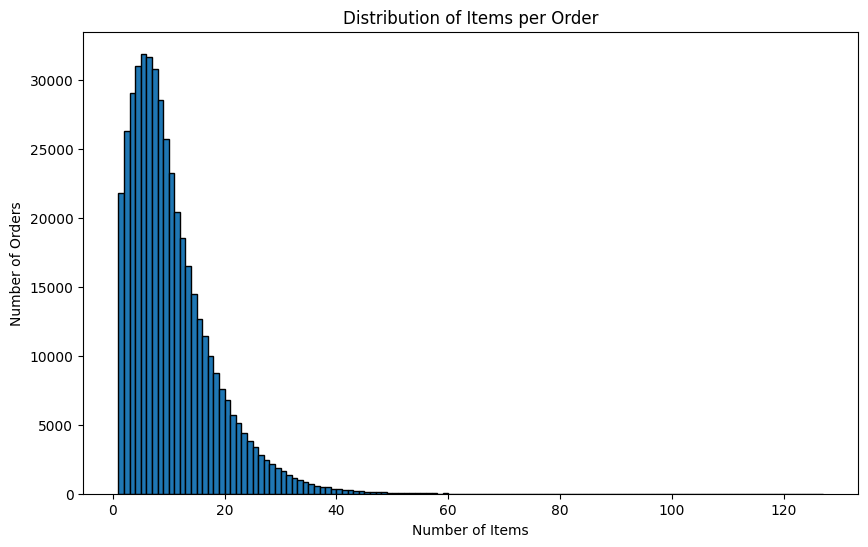

In [44]:
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=range(1, items_per_order.max() + 1), edgecolor='black')
plt.title('Distribution of Items per Order')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.show()


Based on the histogram, it seems that the large majority of orders contain around 10 items. The bins indicates instances of an order being placed at x amount of items.


### [C4] For each customer, what proportion of their products ordered are reorders?

In [45]:
# Merge order_products with instacart_orders to include user_id
merged_data = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id')

# Count reorders and total orders for each user
user_reorders = merged_data[merged_data['reordered'] == 'ordered'].groupby('user_id').size()
total_orders = merged_data.groupby('user_id').size()



In [46]:
# Calculate reorder proportion per user
reorder_proportion = user_reorders / total_orders


# Display the result
reorder_proportion

user_id
2         0.038462
4              NaN
5         0.666667
6              NaN
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Length: 149626, dtype: float64

# Concluding Comments:

After cleaning the data of duplicate & missing values, I was able to figure a few tendancies of the customers' spending habits on Instacart. I would love to see how these habits fluctuate  during the calendar year, given the holidays. It would add an additional layer of complexity and interconnectedness to the study.